# Classification of pima indian diabetes data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the CSV file using Pandas

In [ ]:
Data = pd.read_csv("pima-indians-diabetes.csv", header = None)

#### Initial Exploratory Analysis

In [5]:
Data.shape

(768, 9)

In [16]:
Data.isnull().values.any()

False

In [10]:
X, y = Data.iloc[:, : -1], Data.iloc[:, -1]
y = np.asarray(y)
y = np.reshape(y,(y.shape[0]))

In [12]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


#### Splitting the data into Train and Test Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Fitting the Decision tree Model

In [68]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
modtree = DecisionTreeClassifier()
modtree.fit(X_train, y_train)
ypred = modtree.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, ypred)*100, "%")
print (metrics.classification_report(y_test, ypred))

Training Accuracy
74.67532467532467 %
             precision    recall  f1-score   support

          0       0.83      0.77      0.80        99
          1       0.63      0.71      0.67        55

avg / total       0.76      0.75      0.75       154



#### Searching for the best Parameters

In [ ]:
from sklearn.grid_search import GridSearchCV

tuneparameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10],'min_samples_split': [2,3,4,5,6,7,8,9,10]}]
modtree2 = GridSearchCV(modtree, cv = 100 ,refit = 'true',param_grid = tuneparameters)
modtree2.fit(X, y)

In [20]:
print(modtree2.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9}


#### Accuracy with the best Parameters

In [21]:
from sklearn.metrics import accuracy_score

modtree2.fit(X,y)
ypred = modtree2.predict(X_test)

print(accuracy_score(y_test, ypred))

0.8571428571428571


#### Fitting the Confusion Matrix

[[88 11]
 [11 44]]

Normalized confusion matrix


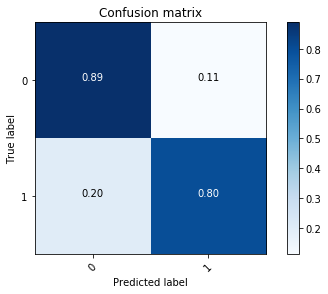

In [30]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#print('1')

cm = confusion_matrix(ypred, y_test)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)
print('')
plot_confusion_matrix(cm,[0,1],normalize=True)
plt.show()

#### Support Vector Machines

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xstd, y, test_size=0.2, random_state=42)

In [39]:
import warnings
modsvm = SVC(probability = True, verbose = True)
modsvm.fit(X_train,y_train)
ypred = modsvm.predict(X_test)
print ("Training Accuracy")
print (metrics.accuracy_score(y_test, ypred)*100, "%")

warnings.filterwarnings(action='ignore', category=UserWarning, module='SVC')

[LibSVM]Training Accuracy
73.37662337662337 %


In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
modsvm2 = GridSearchCV(modsvm, cv = 2 ,refit = 'true',param_grid = tuned_parameters, n_jobs = 4)
modsvm2.fit(X_train,y_train)
#print(modsvm2.best_params_)

In [51]:
modsvm3 = SVC(kernel = 'rbf', C = 1,gamma=0.0001, probability = True)

In [53]:
modsvm3.fit(X_train,y_train)
ypred = modsvm3.predict(X_test)

In [ ]:
print ("Support Vector Machine")
print (metrics.accuracy_score(y_test,ypred)*100)

#### Fitting the ROC curve

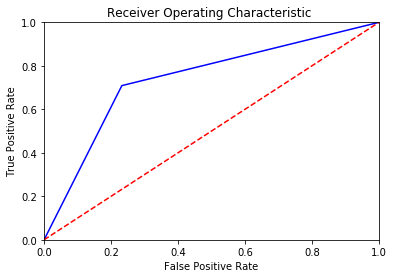

In [72]:
if True: #len(Data.target_names) == 2: #ROC curve code here only for 2 classes
    fpr, tpr, threshold = metrics.roc_curve(y_test, ypred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic ')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()